In [1]:
# Loading required modules

import pandas as pd
import numpy as np
from matplotlib import pyplot as pt
import seaborn as sns
from scipy import stats
import statistics
%matplotlib inline


In [2]:
# Reading the csv file into a pandas dataframe object df

df = pd.read_csv('Web_Scrapped_websites.csv',encoding='iso-8859-1')

# First five rows of df
df.head()

,Country_Rank,Website,Trustworthiness,Avg_Daily_Visitors,Child_Safety,Avg_Daily_Pageviews,Privacy,Facebook_likes,Twitter_mentions,Google_pluses,...,Month_Average_Daily_Reach_percentage,Daily_Pageviews_percentage,Month_Average_Daily_Pageviews_percentage,Daily_Pageviews_per_user_percentage,Location,Hosted_by,Subnetworks,Registrant,Registrar,country
0,1,www.google.com.af,Excellent,NaN,Excellent,NaN,Excellent,9,1,37,...,1.0,-5.1,12.5,-4.1,United States,Google Inc.,216.58.203.227,NaN,NaN,Afghanistan
1,2,www.google.com,Excellent,515 007 350,Excellent,4 192 159 833,Excellent,94.2K,11.2K,11.7M,...,-1.1,1.8,-6.3,2.1,United States,Google Inc.,216.58.194.100,DNS Admin (Google Inc.),MARKMONITOR INC.,Afghanistan
2,3,www.youtube.com,Excellent,506 457 282,Excellent,2 679 159 025,Excellent,13.5K,16.5K,19.3M,...,1.8,9.7,0.5,3.8,United States,Google Inc.,172.217.2.238,DNS Admin (Google Inc.),MARKMONITOR INC.,Afghanistan
3,4,www.facebook.com,Excellent,270 071 255,Good,1 082 985 733,Excellent,5.87M,64.4K,127K,...,-1.5,-8.2,-2.2,-8.2,Ireland,Facebook,31.13.73.36,"Domain Administrator (Facebook, Inc.)",MARKMONITOR INC.,Afghanistan
4,5,www.yahoo.com,Excellent,99 572 035,Excellent,383 352 336,Excellent,17.2K,1.11K,798K,...,-0.8,-4.9,-0.5,-3.2,United States,Yahoo! Inc.,"98.139.180.149, 98.139.183.24",Domain Administrator (Yahoo! Inc.),MARKMONITOR INC.,Afghanistan


In [3]:
#cleaing the data

#gruoping similar columns to perform similar operation


social_media=["Facebook_likes","Twitter_mentions","Google_pluses","LinkedIn_mentions","Pinterest_pins","StumbleUpon_views"]
for i in social_media:
    df[i]=df[i].replace({'[K]':'*1000','[M]':'*1000000','[-]':'0'},regex=True).map(pd.eval).astype(int)
    df[i]=df[i].replace(to_replace=0,value=np.nan,inplace=False)

    
daily_avgs=["Avg_Daily_Visitors","Avg_Daily_Pageviews","Traffic_Rank"]
for i in daily_avgs:
    df[i]=df[i].replace({' ':''},regex=True)
    df[i]=df[i].fillna('0').astype(np.int64)
    df[i]=df[i].replace(to_replace=0,value=np.nan,inplace=False)
    
    
df.head()    

,Country_Rank,Website,Trustworthiness,Avg_Daily_Visitors,Child_Safety,Avg_Daily_Pageviews,Privacy,Facebook_likes,Twitter_mentions,Google_pluses,...,Month_Average_Daily_Reach_percentage,Daily_Pageviews_percentage,Month_Average_Daily_Pageviews_percentage,Daily_Pageviews_per_user_percentage,Location,Hosted_by,Subnetworks,Registrant,Registrar,country
0,1,www.google.com.af,Excellent,NaN,Excellent,NaN,Excellent,9.0,1.0,37.0,...,1.0,-5.1,12.5,-4.1,United States,Google Inc.,216.58.203.227,NaN,NaN,Afghanistan
1,2,www.google.com,Excellent,515007350.0,Excellent,4.192160e+09,Excellent,94200.0,11200.0,11700000.0,...,-1.1,1.8,-6.3,2.1,United States,Google Inc.,216.58.194.100,DNS Admin (Google Inc.),MARKMONITOR INC.,Afghanistan
2,3,www.youtube.com,Excellent,506457282.0,Excellent,2.679159e+09,Excellent,13500.0,16500.0,19300000.0,...,1.8,9.7,0.5,3.8,United States,Google Inc.,172.217.2.238,DNS Admin (Google Inc.),MARKMONITOR INC.,Afghanistan
3,4,www.facebook.com,Excellent,270071255.0,Good,1.082986e+09,Excellent,5870000.0,64400.0,127000.0,...,-1.5,-8.2,-2.2,-8.2,Ireland,Facebook,31.13.73.36,"Domain Administrator (Facebook, Inc.)",MARKMONITOR INC.,Afghanistan
4,5,www.yahoo.com,Excellent,99572035.0,Excellent,3.833523e+08,Excellent,17200.0,1110.0,798000.0,...,-0.8,-4.9,-0.5,-3.2,United States,Yahoo! Inc.,"98.139.180.149, 98.139.183.24",Domain Administrator (Yahoo! Inc.),MARKMONITOR INC.,Afghanistan


In [4]:
#droping null values which cannot to calculated or known

df=df.drop(df[(df.Location.isnull())|(df.Hosted_by.isnull())|(df.Registrant.isnull())|(df.Registrar.isnull())|(df.country.isnull())|(df.Traffic_Rank.isnull())].index)
df=df.drop(df[(df.Avg_Daily_Visitors.isnull())|(df.Avg_Daily_Pageviews.isnull())].index)

#droping columns from which inference cannot be made

df=df[df.columns.drop(['Reach_Day','Month_Average_Daily_Reach','Daily_Pageviews','Month_Average_Daily_Pageviews','Daily_Pageviews_per_user','Reach_Day_percentage', 'Month_Average_Daily_Reach_percentage','Daily_Pageviews_percentage','Month_Average_Daily_Pageviews_percentage','Daily_Pageviews_per_user_percentage','Subnetworks',"Registrar","Registrant"])]

#displaying the columns remaing in the dataframe

df.columns

Index(['Country_Rank', 'Website', 'Trustworthiness', 'Avg_Daily_Visitors',
       'Child_Safety', 'Avg_Daily_Pageviews', 'Privacy', 'Facebook_likes',
       'Twitter_mentions', 'Google_pluses', 'LinkedIn_mentions',
       'Pinterest_pins', 'StumbleUpon_views', 'Status', 'Traffic_Rank',
       'Location', 'Hosted_by', 'country'],
      dtype='object')

In [5]:
#displaying number of null values column wise

for i in df.columns:

    print(df[i].isnull().sum())

0
0
0
0
0
0
0
3306
1836
696
1567
5140
2055
0
0
0
0
0


In [6]:
#reducing null values by merging different social media interaction into a single column

df=df.fillna(0)

df["Social_media_interaction"]=df["Facebook_likes"]+df["Twitter_mentions"]+df['Google_pluses']+df['LinkedIn_mentions']+df['Pinterest_pins']

#droping diffrent social media interactions
for i in social_media:
    df=df[df.columns.drop(i)]
    
#replacing 0 with nan
df["Social_media_interaction"]=df["Social_media_interaction"].replace(to_replace=0,value=np.nan,inplace=False)

#droping rows with null value 
df=df.drop(df[(df.Social_media_interaction.isnull())].index)  

# Looking for null data in the entire dataset
df.isnull().sum().sum()

0

In [7]:
#cleaned data
df

,Country_Rank,Website,Trustworthiness,Avg_Daily_Visitors,Child_Safety,Avg_Daily_Pageviews,Privacy,Status,Traffic_Rank,Location,Hosted_by,country,Social_media_interaction
1,2,www.google.com,Excellent,515007350.0,Excellent,4.192160e+09,Excellent,ok,1.0,United States,Google Inc.,Afghanistan,11817870.0
2,3,www.youtube.com,Excellent,506457282.0,Excellent,2.679159e+09,Excellent,ok,2.0,United States,Google Inc.,Afghanistan,19390047.0
3,4,www.facebook.com,Excellent,270071255.0,Good,1.082986e+09,Excellent,ok,3.0,Ireland,Facebook,Afghanistan,6071780.0
4,5,www.yahoo.com,Excellent,99572035.0,Excellent,3.833523e+08,Excellent,ok,6.0,United States,Yahoo! Inc.,Afghanistan,824243.0
5,6,www.acbar.org,Unknown,100388.0,Unknown,7.127600e+05,Unknown,ok,8011.0,United States,"ARYAN ICT Solutions, LLC",Afghanistan,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9534,45,www.zapmeta.ws,Unknown,914814.0,Unknown,1.948553e+06,Unknown,ok,1464.0,United Kingdom,Everbread Limited IP Space,Zimbabwe,1.0
9535,46,www.newsdzezimbabwe.co.uk,Unknown,11862.0,Unknown,5.101000e+04,Unknown,ok,77934.0,United States,Google Inc.,Zimbabwe,18.0
9536,47,www.nehandaradio.com,Unknown,9946.0,Unknown,1.989400e+04,Unknown,ok,58327.0,United States,"CloudFlare, Inc.",Zimbabwe,477.0
9538,49,www.ntd.tv,Unsatisfactory,163932.0,Good,2.163920e+05,Unsatisfactory,ok,37.0,United States,"CloudFlare, Inc.",Zimbabwe,164.0


In [8]:
#statsitcal analysis of the data(statiscal analysis of Country_Rank and Traffic_Rank is irrelavant)

df.describe()

,Country_Rank,Avg_Daily_Visitors,Avg_Daily_Pageviews,Traffic_Rank,Social_media_interaction
count,7834.000000,7.834000e+03,7.834000e+03,7.834000e+03,7.834000e+03
mean,25.094077,4.834783e+07,2.626371e+08,8.468679e+03,1.577274e+06
std,14.484722,1.147216e+08,7.617907e+08,4.383430e+04,4.078580e+06
min,1.000000,1.710000e+02,5.100000e+02,1.000000e+00,1.000000e+00
25%,12.000000,4.624312e+05,1.512693e+06,3.400000e+01,7.930000e+02
50%,25.000000,8.558796e+06,2.561836e+07,8.100000e+01,1.729000e+04
75%,38.000000,2.656781e+07,1.443468e+08,1.345250e+03,5.514990e+05
max,50.000000,5.181082e+08,4.192160e+09,1.074822e+06,3.629220e+07


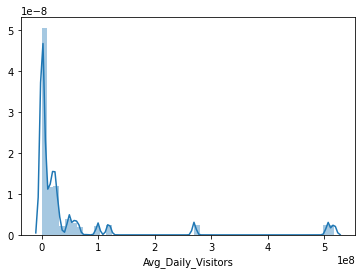

In [9]:
#plotting graphs
#distribution plot 
sns.distplot(df["Avg_Daily_Visitors"])


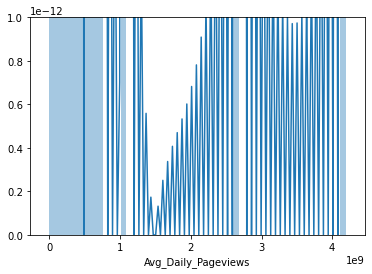

In [10]:
sns.distplot(df["Avg_Daily_Pageviews"])


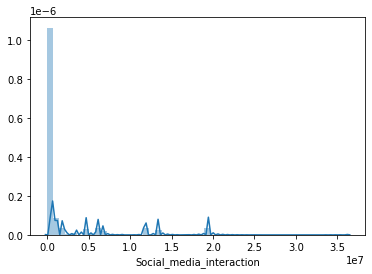

In [11]:
sns.distplot(df["Social_media_interaction"])

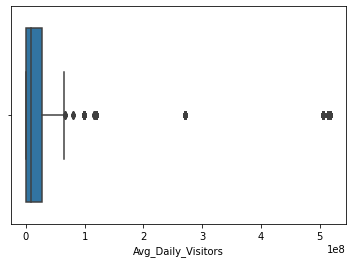

In [12]:
#box plot
sns.boxplot(df['Avg_Daily_Visitors'])

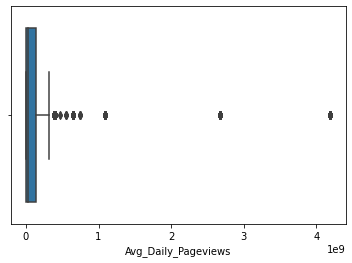

In [13]:
sns.boxplot(df['Avg_Daily_Pageviews'])

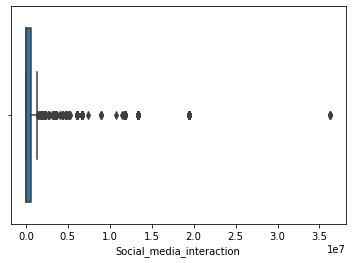

In [14]:
sns.boxplot(df['Social_media_interaction'])

##### INFERENCE:
    
    1. The dataset is highly positively skewed and it makes data analysis difficult.So,normalization is required
    2. The dataset is highly irregular and it is diificult to make conclusions
    3. Column-Social_meadia_interactions has a large number of outliers compared to the other two columns Avg_Daily_Visitors          and Avg_Daily_Previews which has just handfull of outliers
    4. Therfore dataset must be normalized to make better predictions on the data set
    

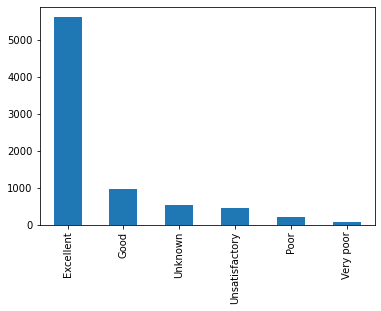

In [15]:
df['Trustworthiness'].value_counts().plot(kind='bar')

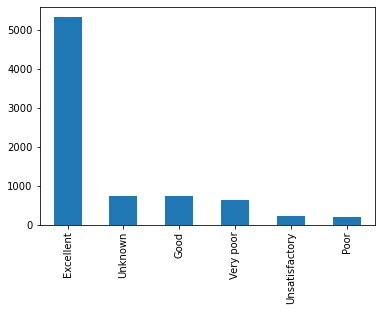

In [16]:
df['Child_Safety'].value_counts().plot(kind='bar')

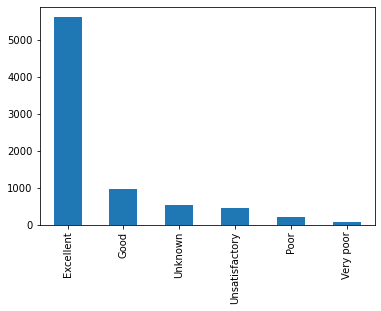

In [17]:
df['Privacy'].value_counts().plot(kind='bar')

#### INFERENCE:
    1. Trustworthiness of the websites are remarkarbly  excellent and relatively small number of websites are good .A small      number of websites doesn't havve the the trust of the users and small portion of the data is unkown.
    2. Child safety provided by  the websites are remarkarbly  excellent and relatively small number of websites are good .A    small number of websites doesn't provide child safety for the users and small portion of the data is unkown.
    3. Privacy of the websites are remarkarbly  excellent and relatively small number of websites are good .A small number   of  websites doesn't havve the the trust of the users and small portion of the data is unkown.
    4. Its good to see that most of websites upholds child safety and privacy and has gain the trust of the users and  a    small proportion of the websites are underperforming on child safety and privacy.
    

In [18]:
column=['Avg_Daily_Visitors','Avg_Daily_Pageviews','Social_media_interaction']
for i in column:
    print(df[i].skew())

3.3532895414161388
4.118707571970927
3.3487428083652424


In [19]:
#removing the skewness of the data boxcox method

df_box=pd.DataFrame.copy(df)
for i in column:
    df_box[i]=stats.boxcox(df[i])[0]

In [20]:
for i in column:
    print(df_box[i].skew())

-0.06467382447950648
-0.0366114323414018
-0.035088381569041066


In [21]:
df_box.describe()

,Country_Rank,Avg_Daily_Visitors,Avg_Daily_Pageviews,Traffic_Rank,Social_media_interaction
count,7834.000000,7834.000000,7834.000000,7.834000e+03,7834.000000
mean,25.094077,32.592536,29.248510,8.468679e+03,11.349108
std,14.484722,10.587392,8.345123,4.383430e+04,5.598382
min,1.000000,6.467092,7.600255,1.000000e+00,0.000000
25%,12.000000,24.082731,22.765342,3.400000e+01,7.324421
50%,25.000000,34.274121,30.189434,8.100000e+01,11.184624
75%,38.000000,38.972712,35.405343,1.345250e+03,15.927940
max,50.000000,53.707386,47.311399,1.074822e+06,22.297165


In [22]:
df.describe()

,Country_Rank,Avg_Daily_Visitors,Avg_Daily_Pageviews,Traffic_Rank,Social_media_interaction
count,7834.000000,7.834000e+03,7.834000e+03,7.834000e+03,7.834000e+03
mean,25.094077,4.834783e+07,2.626371e+08,8.468679e+03,1.577274e+06
std,14.484722,1.147216e+08,7.617907e+08,4.383430e+04,4.078580e+06
min,1.000000,1.710000e+02,5.100000e+02,1.000000e+00,1.000000e+00
25%,12.000000,4.624312e+05,1.512693e+06,3.400000e+01,7.930000e+02
50%,25.000000,8.558796e+06,2.561836e+07,8.100000e+01,1.729000e+04
75%,38.000000,2.656781e+07,1.443468e+08,1.345250e+03,5.514990e+05
max,50.000000,5.181082e+08,4.192160e+09,1.074822e+06,3.629220e+07


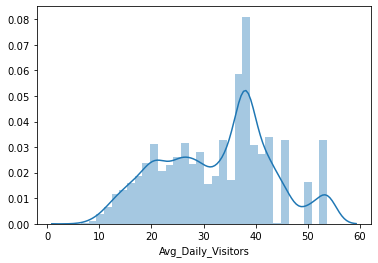

In [23]:
sns.distplot(df_box["Avg_Daily_Visitors"])

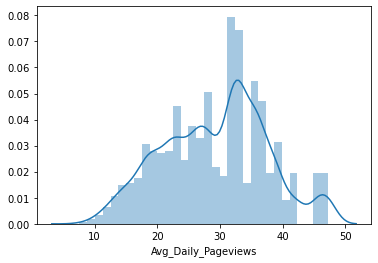

In [24]:
sns.distplot(df_box["Avg_Daily_Pageviews"])

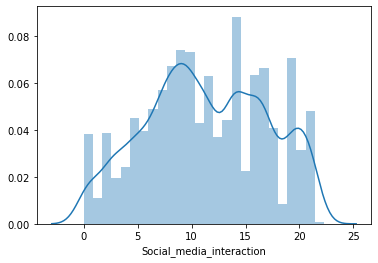

In [25]:
sns.distplot(df_box["Social_media_interaction"])

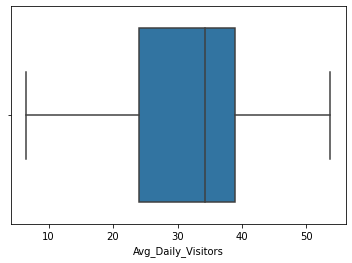

In [26]:
sns.boxplot(df_box['Avg_Daily_Visitors'])

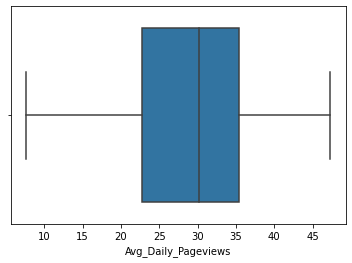

In [27]:
sns.boxplot(df_box['Avg_Daily_Pageviews'])

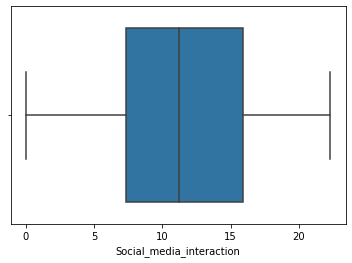

In [28]:
sns.boxplot(df_box['Social_media_interaction'])

#### INFERENCE:
        1. Boxcox method is use to normalize the dataset .It can be noted that the skewness almost has reduced near to zero.
        2. The dataset better normalized than the original form and the data is more evenly distributed than before.
        3. The data interpratation will be  easier and more precise

In [29]:
#Setting mean mu=0 and standard devisation s=1
df_norm=pd.DataFrame.copy(df_box)
for i in column:
    df_norm[i]=df_box[i]-df_box[i].mean()
    df_norm[i]=df_norm[i]/df_box[i].std()            

In [30]:
df_norm.describe()

,Country_Rank,Avg_Daily_Visitors,Avg_Daily_Pageviews,Traffic_Rank,Social_media_interaction
count,7834.000000,7.834000e+03,7.834000e+03,7.834000e+03,7.834000e+03
mean,25.094077,5.618113e-15,2.451383e-14,8.468679e+03,7.808918e-15
std,14.484722,1.000000e+00,1.000000e+00,4.383430e+04,1.000000e+00
min,1.000000,-2.467599e+00,-2.594121e+00,1.000000e+00,-2.027212e+00
25%,12.000000,-8.037678e-01,-7.768811e-01,3.400000e+01,-7.189019e-01
50%,25.000000,1.588290e-01,1.127513e-01,8.100000e+01,-2.938069e-02
75%,38.000000,6.026202e-01,7.377761e-01,1.345250e+03,8.178849e-01
max,50.000000,1.994339e+00,2.164484e+00,1.074822e+06,1.955575e+00


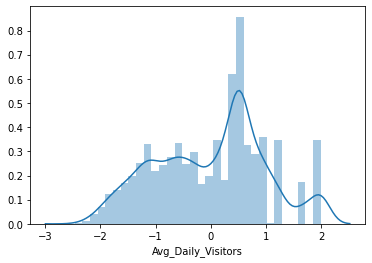

In [31]:
sns.distplot(df_norm["Avg_Daily_Visitors"])

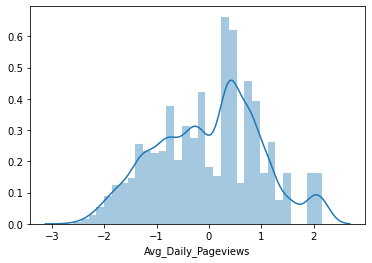

In [32]:
sns.distplot(df_norm["Avg_Daily_Pageviews"])

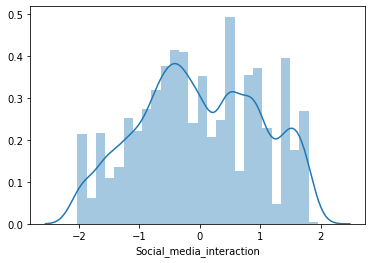

In [33]:
sns.distplot(df_norm["Social_media_interaction"])

#### Value count in terms of percentage:

#### Trustworthiness:

In [34]:
df['Trustworthiness'].value_counts(normalize=True)

Excellent         0.716109
Good              0.123309
Unknown           0.068675
Unsatisfactory    0.056421
Poor              0.027444
Very poor         0.008042
Name: Trustworthiness, dtype: float64

#### Child safety:

In [35]:
df['Child_Safety'].value_counts(normalize=True)

Excellent         0.679602
Unknown           0.094715
Good              0.092801
Very poor         0.080291
Unsatisfactory    0.028338
Poor              0.024253
Name: Child_Safety, dtype: float64

#### Privacy:

In [36]:
df['Privacy'].value_counts(normalize=True)

Excellent         0.716109
Good              0.123309
Unknown           0.068675
Unsatisfactory    0.056421
Poor              0.027444
Very poor         0.008042
Name: Privacy, dtype: float64

#### Location:

In [37]:
df["Location"].value_counts(normalize=True)

United States         0.680240
Netherlands           0.062803
Ireland               0.032933
France                0.028466
Russian Federation    0.027827
                        ...   
Paraguay              0.000128
Morocco               0.000128
Mali                  0.000128
Albania               0.000128
Dominican Republic    0.000128
Name: Location, Length: 103, dtype: float64

#### Hostedby:

In [38]:
df["Hosted_by"].value_counts(normalize=True)

CloudFlare, Inc.             0.120117
Akamai Technologies, Inc.    0.099821
Google Inc.                  0.089482
Microsoft Corporation        0.053868
Amazon Technologies Inc.     0.042124
                               ...   
NTT KOREA                    0.000128
Tieto Oyj                    0.000128
XNET PPPoE Customers         0.000128
SC STARNET SRL               0.000128
Artashat City                0.000128
Name: Hosted_by, Length: 897, dtype: float64

#### Popularity:

In [39]:
# selecting the top 10 ranked websites of differnt countries
popular_websites=df["Website"].loc[df["Country_Rank"]<=10]
popular_websites.value_counts(normalize=True)

www.google.com        0.113841
www.youtube.com       0.113241
www.facebook.com      0.107250
www.wikipedia.org     0.088077
www.yahoo.com         0.075494
                        ...   
www.nrttv.com         0.000599
www.sahibinden.com    0.000599
www.kurir.rs          0.000599
www.essahraa.net      0.000599
www.google.de         0.000599
Name: Website, Length: 435, dtype: float64

#### Inference:
       1. www.google.com is the most popular and top rated website
       2. www.google.hr , www.google.com.au ,www.google.co.nz ,www.as.com , www.namak.com are some of the least popular                websites

### Correlation:

In [45]:
df['Avg_Daily_Visitors'].corr(df['Avg_Daily_Pageviews'])

0.9618275802295062

In [43]:
df['Social_media_interaction'].corr(df['Avg_Daily_Visitors'])

0.8123506481598187

In [42]:
df['Avg_Daily_Pageviews'].corr(df['Social_media_interaction'])

0.7507993747270986

#### Inference:
                All the columns are positivly correlated to each other.

# For column Social media interaction

In [46]:

number_of_values=len(df)
sample_data=df["Social_media_interaction"]
sample_mean=statistics.mean(sample_data)
sample_sd=statistics.stdev(sample_data)

#Hypothesis
#Null hypothesis

#H0:The average social media interaction is 2 million(mu=2e6) 
H0="The average social meadia interaction is 2 million(mu=2e6)"

#Alternate hypothesis
#H1:The average social meadia interaction is not equal to 2 million(mu!=2e6)
H1="The average social meadia interaction is not equal to 2 million(mu!=2e6)"

population_mean_from_hypothesis=2e6  

#Determining if the test is one tailed or two tailed and alloting alpha value
test="two_sided_test"
if(test=="two_sided_test"):
    number_of_tails=2
    alpha=0.025
elif(test=="one_sided_test"):
    number_of_tails=1
    alpha=0.05
    
#z_score
z_score=(sample_mean-population_mean_from_hypothesis) /(sample_sd/np.sqrt(number_of_values))
#p_value
p_value=stats.norm.sf(z_score)

if (p_value > alpha):
    print("Null hypothesis accepted")
    print("Accepted hypothesis is H0:",H0)
    
else:
    print("Null hypothesis is rejected and alternate hypothesis is accepted")
    print("Accepted hypothesis is H1:",H1)

    
print('z_score= %.10f' % (z_score))
print('p_value= %.10f' % (p_value))
print('sample_mean= %.10f' % (sample_mean))
print('sample_sd= %.10f' % (sample_sd))
print('The test is '+str(number_of_tails)+" tailed test")

Null hypothesis accepted
Accepted hypothesis is H0: The average social meadia interaction is 2 million(mu=2e6)
z_score= -9.1736401580
p_value= 1.0000000000
sample_mean= 1577274.1060760787
sample_sd= 4078579.5199740939
The test is 2 tailed test


# For column Avg daily previews

In [47]:

number_of_values=len(df)
sample_data=df["Avg_Daily_Pageviews"]
sample_mean=df["Avg_Daily_Pageviews"].mean()
sample_sd=df["Avg_Daily_Pageviews"].std()

#Hypothesis
#Null hypothesis

#H0:The average daily previews is 250 million(mu=2.5e8) 
H0="The average daily previews is 250 million(mu=2.5e8)"

#Alternate hypothesis
#H1:The average daily previews is not equal to 250 million(mu!=2.5e8)
H1="The average daily previews is not equal to 250 million(mu!=2.5e8)"

#Determining if the test is one tailed or two tailed and alloting alpha value
test="one_sided_test"
if(test=="two_sided_test"):
    number_of_tails=2
    alpha=0.025
elif(test=="one_sided_test"):
    number_of_tails=1
    alpha=0.05
    
population_mean_from_hypothesis=2.5e8  

#z_score
z_score=(sample_mean-population_mean_from_hypothesis) /(sample_sd/np.sqrt(number_of_values))
#p_value
p_value=stats.norm.sf(z_score)

if (p_value > alpha):
    print("Null hypothesis accepted")
    print("Accepted hypothesis is H0:",H0)
else:
    print("Null hypothesis is rejected and alternate hypothesis is accepted")
    print("Accepted hypothesis is H1:",H1)    

    
print('z_score= %.10f' % (z_score))
print('p_value= %.10f' % (p_value))
print('sample_mean= %.10f' % (sample_mean))
print('sample_sd= %.10f' % (sample_sd))
print('The test is '+str(number_of_tails)+" tailed test")

Null hypothesis accepted
Accepted hypothesis is H0: The average daily previews is 250 million(mu=2.5e8)
z_score= 1.4682603522
p_value= 0.0710167581
sample_mean= 262637086.5693132579
sample_sd= 761790710.7976064682
The test is 1 tailed test


# For column Avg daily visitors

In [48]:
number_of_values=len(df)
sample_data=df["Avg_Daily_Visitors"]
sample_mean=statistics.mean(sample_data)
sample_sd=statistics.stdev(sample_data)

#Hypothesis
#Null hypothesis

#H0:The average daily visitors is 50 million(mu=5e7) 
H0="The average daily visitors is 50 million(mu=5e7)"

#Alternate hypothesis
#H1:The average daily visitors is not equal to 45 million(mu!=4.5e7)
H1="The average daily visitors is not equal to 45 million(mu!=4.5e7)"

#Determining if the test is one tailed or two tailed and alloting alpha value
test="two_sided_test"
if(test=="two_sided_test"):
    number_of_tails=2
    alpha=0.025
elif(test=="one_sided_test"):
    number_of_tails=1
    alpha=0.05
    
population_mean_from_hypothesis=4.5e7   

#z_score
z_score=(sample_mean-population_mean_from_hypothesis) /(sample_sd/np.sqrt(number_of_values))
#p_value
p_value=stats.norm.sf(z_score)

if (p_value > alpha):
    print("Null hypothesis accepted")
    print("Accepted hypothesis is H0:",H0)
else:
    print("Null hypothesis is rejected and alternate hypothesis is accepted")
    print("Accepted hypothesis is H1:",H1)    

    
print('z_score= %.10f' % (z_score))
print('p_value= %.10f' % (p_value))
print('sample_mean= %.10f' % (sample_mean))
print('sample_sd= %.10f' % (sample_sd))
print('The test is '+str(number_of_tails)+" tailed test")

Null hypothesis is rejected and alternate hypothesis is accepted
Accepted hypothesis is H1: The average daily visitors is not equal to 45 million(mu!=4.5e7)
z_score= 2.5829140429
p_value= 0.0048984864
sample_mean= 48347829.5264232829
sample_sd= 114721592.0974674225
The test is 2 tailed test


## Conclusion:
        1.  Trustworthiness:
            a. 71.61% of the websites have completly  gained over the trust of the users.
            b. 12.33% of the websites have statisfied the users regarding trust.
            c. 9.18 % of the websites have failed to gain the trust of it users i.e,they are poor or very poor or                   unsatisfactory
        2.  Child safety:
            a. 67.96% of the websites provide excellet child safety measures to keep the young underaged users safe and             avoiding misguidence
            b. 9.28% of the websites provide good quality child safety yet it can imoroved.
            c. 13.28 % of the websites have failed to provide child safety its users i.e,they are poor or very poor or             unsatisfactory and this often may miss lead younger generation.
        3.  Privacy:
            a. 71.61% of the websites provide excellet privacy and security measures to its users.
            b. 12.33% of the websites provide good quality of security and privacy to its users.
            c. 9.18% of the websites have failed to provide privacy to its users i.e the users are unsatisfied ragarding           privacy and say they are poor very poor or unsatisfactory.
        4.  Location:
              68.02% of the websites belongs to the Unites States(US) and rest percentange of the websites are spread across the globe.
        5.  Hostedby:
             CloudFlare-12.01%,Akamai Technologies-9.98%,Google-8.94%,Microsoft Corporation-5.38%,Amazon Technologies-4.21% are the major server providers.
        6.  Popularity:
            a. www.google.com is the most popular website among the websites as the appear the most in the top 10 ranked websites with most appearances in top 10 rank accross the countries
            b. www.youtube.com  is the second most popular website followed by www.facebook.com,www.wikipedia.org,www.yahoo.com
            c. www.google.hr , www.google.com.au , www.google.co.nz , www.as.com , www.namnak.com are some of least popular websites.  